# Lead Scoring Case Study

## Problem Statement

### Importing required Libraries

In [6]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np

# For Visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For Train_Test Split
from sklearn.model_selection import train_test_split

# For Rescaling Features
from sklearn.preprocessing import StandardScaler

# RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Model Building
import statsmodels.api as sm

# VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Confusion Matrix
from sklearn import metrics

## Step 1: Importing and Understanding the dataset

In [26]:
#Read the data
lead_data = pd.read_csv("Leads.csv")

#A look at the data
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [27]:
# Number of rows and columns 
lead_data.shape

(9240, 37)

In [28]:
# Statistical aspects of the dataframe
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [29]:
# Datatype of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [30]:
# Checking for the duplicates
lead_data[lead_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


## Step 2: Data Cleaning 

In [31]:
# Creating a copy of dataset into another dataframe so as not to lose any valuable information
lead_df = lead_data

### a) Handling 'Select' level 

In [32]:
# Converting 'Select' values to NaN.
lead_df = lead_df.replace('Select', np.nan)

### b) Dropping unwanted columns

In [33]:
# Columns with Unique Values
# Dropping columns that are skewwed with only one unique value for all the leads.
cols = []
for i in lead_df.columns:
    if lead_df[i].nunique() ==1:
        cols.append(i)
lead_df.drop(cols, axis =1,inplace = True)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [34]:
# Dropping Prospect ID as it is the unique ID with which the customer is identified but this can also be achieved with 
# Lead Number
lead_df = lead_df.drop(['Prospect ID'], 1)
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


### c) Handling Null Values

In [35]:
# Checking the columns for null values
lead_df.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [36]:
# Finding the null percentages 
round(lead_df.isnull().sum()/len(lead_df.index),2)*100

Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                   

In [37]:
#Dropping all columns having a missing value percentage greater than 40%.
lead_df = lead_df.drop(lead_df.loc[:,list((100*(lead_df.isnull().sum()/len(lead_df.index))>=40))].columns, 1)

In [38]:
# Ckecking again the null percentages 
round(lead_df.isnull().sum()/len(lead_df.index),2)*100

Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                                         0.0
Digital Advertisement       

 #### Imputing Null values

#### a) Column 'City' - 40% missing values

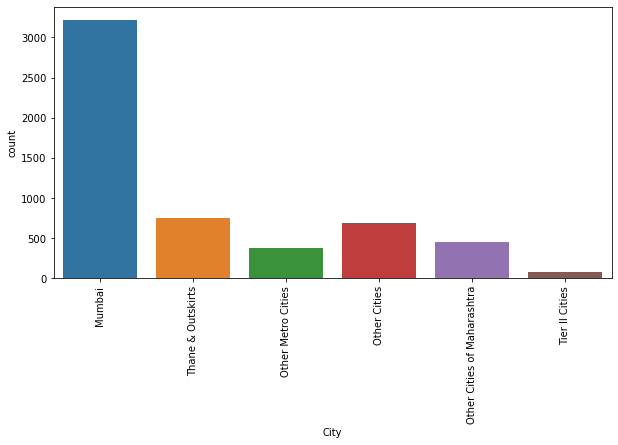

In [39]:
# Plotting Histogram value distribution
plt.figure(figsize=(10,5))
sns.countplot(lead_df['City'])
plt.xticks(rotation=90)
plt.show()

In [40]:
# Finding the percentage of the different values distribution
round(lead_df['City'].value_counts(normalize=True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

In [41]:
# Imputing null values in the 'City' column with 'Mumbai'
lead_df['City']=lead_df['City'].replace(np.nan,'Mumbai')

#### b) Column 'Specialization' - 37% missing values

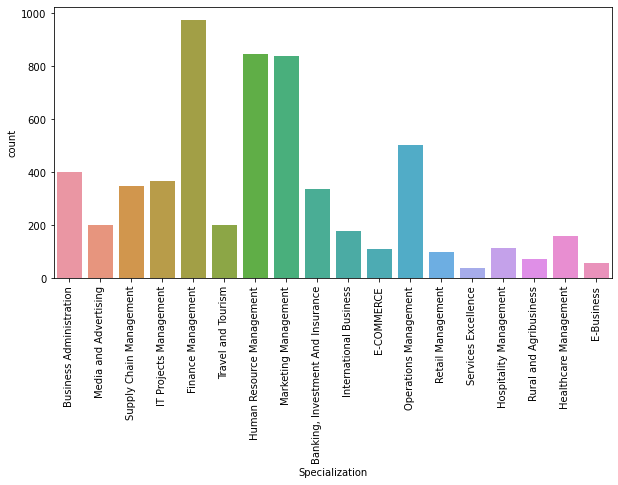

In [42]:
# Plotting Histogram for value distribution
plt.figure(figsize=(10,5))
sns.countplot(lead_df['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [43]:
# Finding the percentage of the different values distribution
round(lead_df['Specialization'].value_counts(normalize=True),2)*100

Finance Management                   17.0
Human Resource Management            14.0
Marketing Management                 14.0
Operations Management                 9.0
Business Administration               7.0
IT Projects Management                6.0
Supply Chain Management               6.0
Banking, Investment And Insurance     6.0
Travel and Tourism                    3.0
Media and Advertising                 3.0
International Business                3.0
Healthcare Management                 3.0
Hospitality Management                2.0
E-COMMERCE                            2.0
Retail Management                     2.0
Rural and Agribusiness                1.0
E-Business                            1.0
Services Excellence                   1.0
Name: Specialization, dtype: float64

In [44]:
# Creating a additinal category named 'Others' for missing values 
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Others')

#### c) Column 'Tags' - 36% missing values

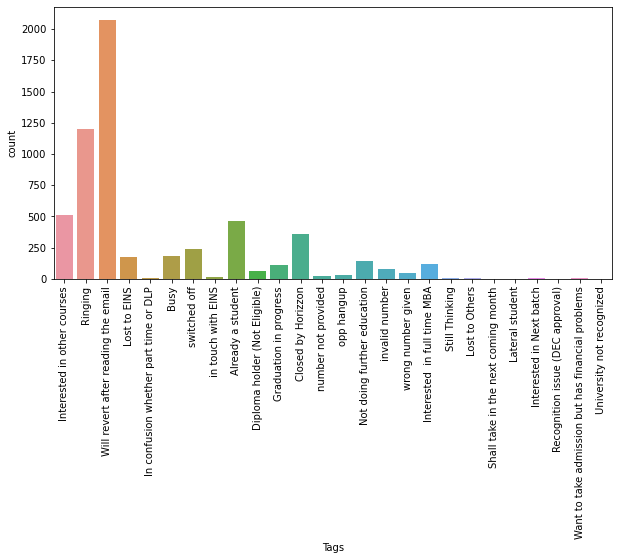

In [45]:
# Plotting Histogram for value distribution
plt.figure(figsize=(10,5))
sns.countplot(lead_df['Tags'])
plt.xticks(rotation=90)
plt.show()

In [46]:
# Finding the percentage of the different values distribution
round(lead_df['Tags'].value_counts(normalize=True),2)*100

Will revert after reading the email                  35.0
Ringing                                              20.0
Interested in other courses                           9.0
Already a student                                     8.0
Closed by Horizzon                                    6.0
switched off                                          4.0
Busy                                                  3.0
Lost to EINS                                          3.0
Not doing further education                           2.0
Interested  in full time MBA                          2.0
Graduation in progress                                2.0
invalid number                                        1.0
Diploma holder (Not Eligible)                         1.0
wrong number given                                    1.0
opp hangup                                            1.0
number not provided                                   0.0
in touch with EINS                                    0.0
Lost to Others

In [47]:
# Imputing the null values in the 'Tags' column with 'Will revert after reading the email'
lead_df['Tags']=lead_df['Tags'].replace(np.nan,'Will revert after reading the email')

#### d) Column 'What is your current occupation' - 29% missing values

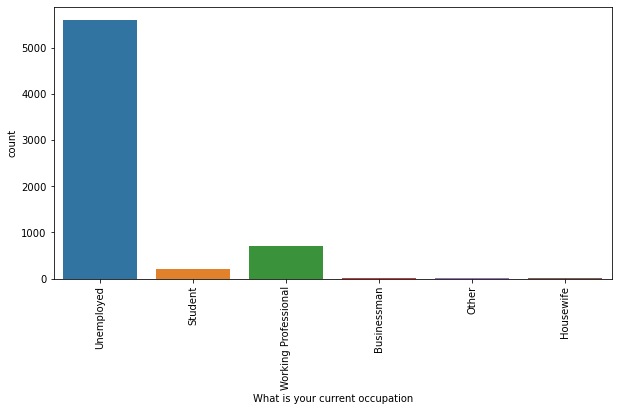

In [48]:
# Plotting Histogram for value distribution
plt.figure(figsize=(10,5))
sns.countplot(lead_df['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

In [49]:
# Finding the percentage of the different values distribution
round(lead_df['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

In [50]:
# Imputing the null values in the 'What is your current occupation' column with 'Unemployed'
lead_df['What is your current occupation']=lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

#### e) Column 'What matters most to you in choosing a course' - 29% missing values

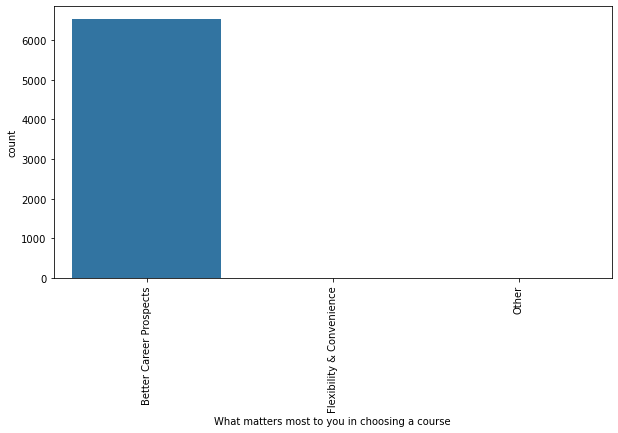

In [51]:
# Plotting Histogram for value distribution
plt.figure(figsize=(10,5))
sns.countplot(lead_df['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.show()

In [52]:
# Finding the percentage of the different values distribution
round(lead_df['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [53]:
# Dropping 'What matters most to you in choosing a course' column 
lead_df=lead_df.drop('What matters most to you in choosing a course',axis=1)

#### f) Column 'Country' - 27% missing values

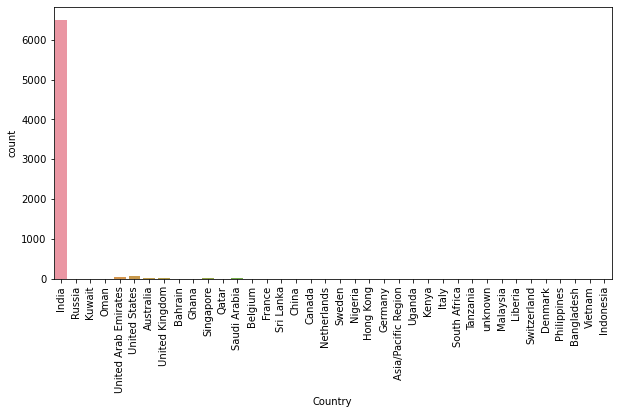

In [54]:
# Plotting Histogram for value distribution
plt.figure(figsize=(10,5))
sns.countplot(lead_df['Country'])
plt.xticks(rotation=90)
plt.show()

In [55]:
# Finding the percentage of the different values distribution
round(lead_df['Country'].value_counts(normalize=True),2)*100

India                   96.0
United States            1.0
United Arab Emirates     1.0
Singapore                0.0
Saudi Arabia             0.0
United Kingdom           0.0
Australia                0.0
Qatar                    0.0
Hong Kong                0.0
Bahrain                  0.0
Oman                     0.0
France                   0.0
unknown                  0.0
South Africa             0.0
Nigeria                  0.0
Germany                  0.0
Kuwait                   0.0
Canada                   0.0
Sweden                   0.0
China                    0.0
Asia/Pacific Region      0.0
Uganda                   0.0
Bangladesh               0.0
Italy                    0.0
Belgium                  0.0
Netherlands              0.0
Ghana                    0.0
Philippines              0.0
Russia                   0.0
Switzerland              0.0
Vietnam                  0.0
Denmark                  0.0
Tanzania                 0.0
Liberia                  0.0
Malaysia      

In [56]:
# Imputing the null values in the 'Country' column with 'India'
lead_df['Country']=lead_df['Country'].replace(np.nan,'India')

#### g) Column 'Last Activity ' - 1% missing values

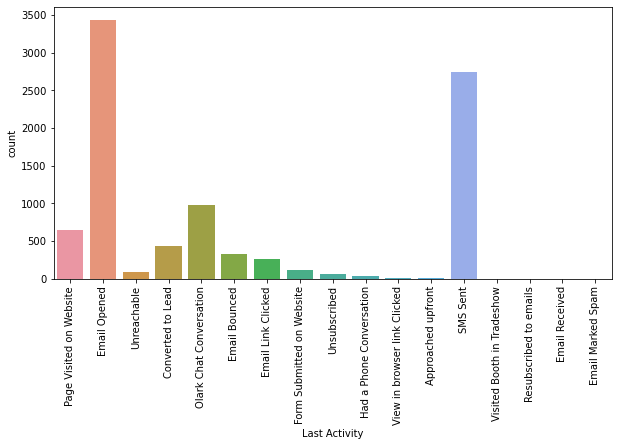

In [57]:
# Plotting Histogram for value distribution
plt.figure(figsize=(10,5))
sns.countplot(lead_df['Last Activity'])
plt.xticks(rotation=90)
plt.show()

In [58]:
# Finding the percentage of the different values distribution
round(lead_df['Last Activity'].value_counts(normalize=True),2)*100

Email Opened                    38.0
SMS Sent                        30.0
Olark Chat Conversation         11.0
Page Visited on Website          7.0
Converted to Lead                5.0
Email Bounced                    4.0
Email Link Clicked               3.0
Form Submitted on Website        1.0
Unreachable                      1.0
Unsubscribed                     1.0
Had a Phone Conversation         0.0
Approached upfront               0.0
View in browser link Clicked     0.0
Email Received                   0.0
Email Marked Spam                0.0
Visited Booth in Tradeshow       0.0
Resubscribed to emails           0.0
Name: Last Activity, dtype: float64

In [59]:
# Imputing the null values in the 'Last Activity' column with 'Email Opened'
lead_df['Last Activity']=lead_df['Last Activity'].replace(np.nan,'Email Opened')

#### h) Column 'TotalVisits' - 1% missing values

In [60]:
# Being a numerical variable, we find the stats for the column
lead_df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [61]:
# Imputing missing values in 'TotalVisits' with median
lead_df['TotalVisits'].fillna(lead_df['TotalVisits'].median(),inplace=True)

#### i) Column 'Page Views Per Visit' - 1% missing values

In [62]:
# Being a numerical variable, we find the stats for the column
lead_df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [63]:
# Imputing missing values in 'Page Views Per Visit' with median
lead_df['Page Views Per Visit'].fillna(lead_df['Page Views Per Visit'].median(),inplace=True)

In [64]:
# Rechecking for all the null value percentages
round(lead_df.isnull().sum()/len(lead_df.index),2)*100

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Inter

## Exploratory Data Analysis

### Bivariate Analysis

### 1) Lead Origin

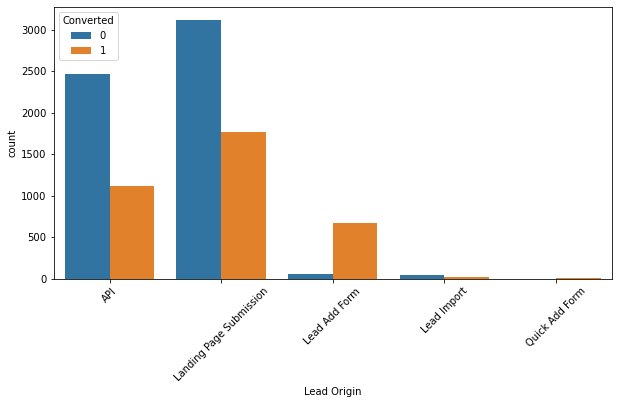

In [65]:
# Countplot with reference to target variable
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_df)
plt.xticks(rotation = 45)
plt.show()

### 2) Lead Source

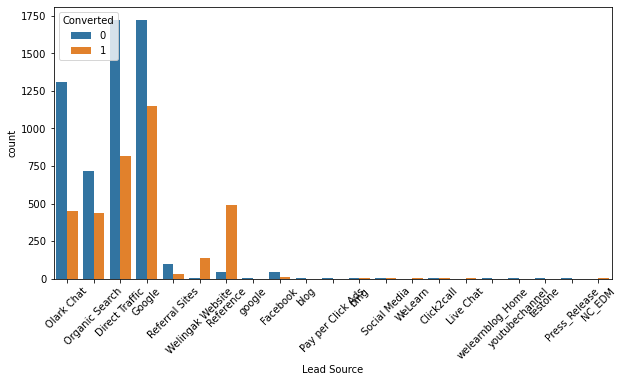

In [66]:
# Countplot with reference to target variable
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df)
plt.xticks(rotation = 45)
plt.show()

In [67]:
# We need to replace 'google' with 'Google'
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['google'], 'Google')

In [68]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

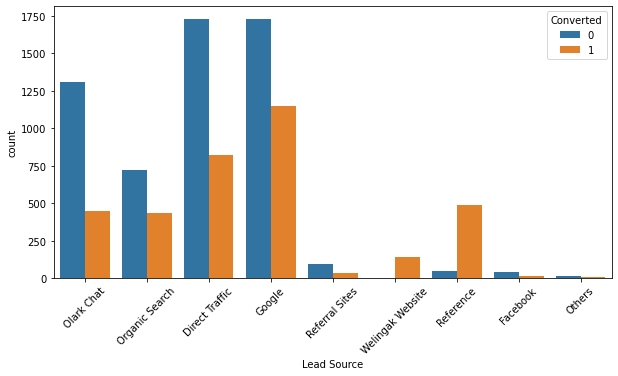

In [69]:
# Again creating countplot
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df)
plt.xticks(rotation = 45)
plt.show()

### 3) Do Not Email

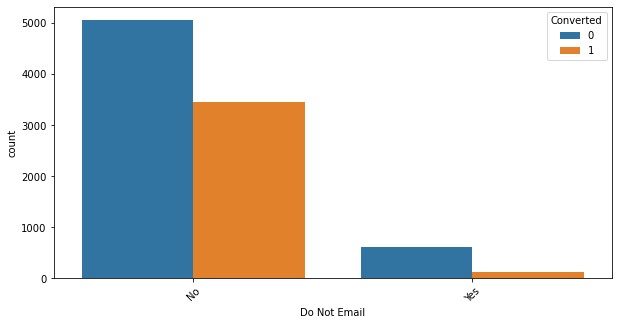

In [70]:
# Countplot with reference to target variable
plt.figure(figsize=(10,5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_df)
plt.xticks(rotation = 45)
plt.show()

### 4) Do Not Call

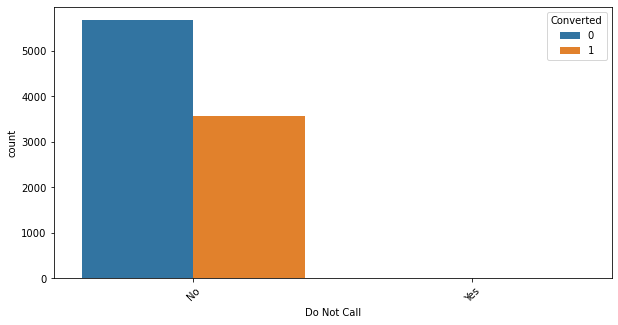

In [72]:
# Countplot with reference to target variable
plt.figure(figsize=(10,5))
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_df)
plt.xticks(rotation = 45)
plt.show()

### 5) TotalVisits

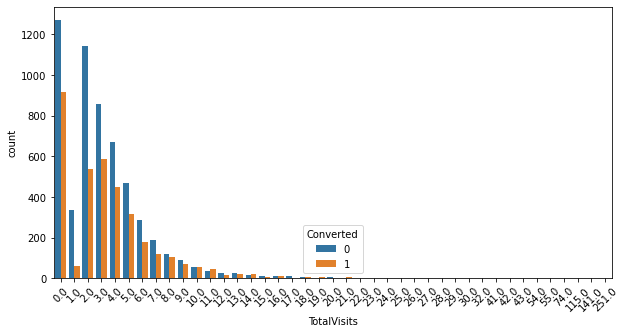

In [74]:
# Countplot with reference to target variable
plt.figure(figsize=(10,5))
sns.countplot(x = "TotalVisits", hue = "Converted", data = lead_df)
plt.xticks(rotation = 45)
plt.show()

In [75]:
lead_df['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

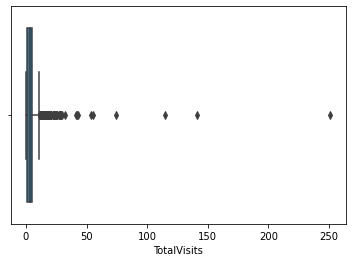

In [76]:
# Boxplot to point out outliers
sns.boxplot(lead_df['TotalVisits'])
plt.show()

In [77]:
percentiles = lead_df['TotalVisits'].quantile([0.05,0.95]).values
lead_df['TotalVisits'][lead_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_df['TotalVisits'][lead_df['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

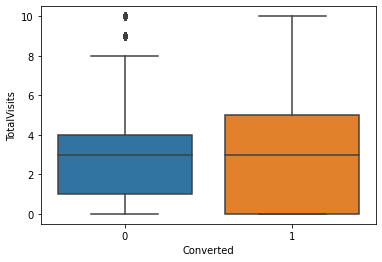

In [78]:
# BoxPlot with reference to the target variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)

### 6) Total Time Spent on Website

In [79]:
# Look on the stats
lead_df['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

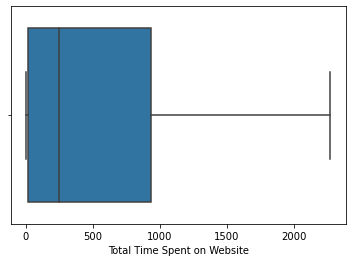

In [80]:
# Boxplot to point out outliers
sns.boxplot(lead_df['Total Time Spent on Website'])
plt.show()

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

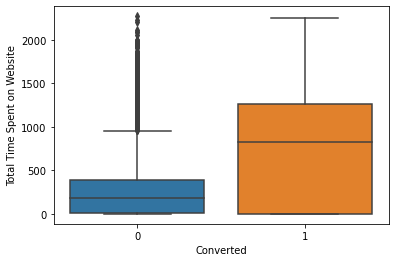

In [81]:
# BoxPlot with reference to the target variable
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df)

### 7) Page Views Per Visit

In [82]:
# Look on the stats
lead_data['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

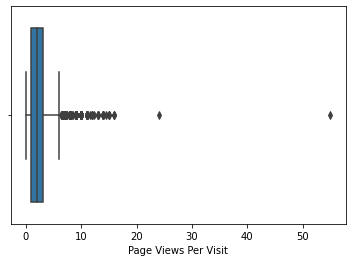

In [83]:
# Boxplot to point out outliers
sns.boxplot(lead_df['Page Views Per Visit'])
plt.show()

In [84]:
# Capping outliers to 95% value for further analysis
percentiles = lead_df['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

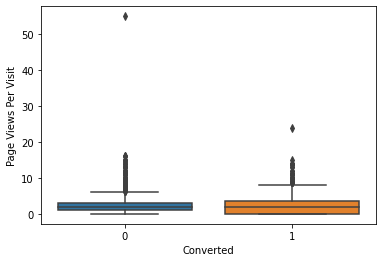

In [85]:
# BoxPlot with reference to the target variable
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead_data)

### 8) Last Activity

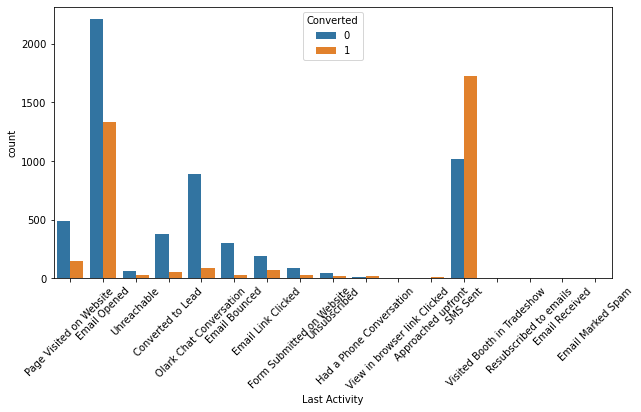

In [86]:
# Countplot with reference to target variable
plt.figure(figsize=(10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df)
plt.xticks(rotation = 45)
plt.show()

In [87]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'],
                                                                'Other_Activity')

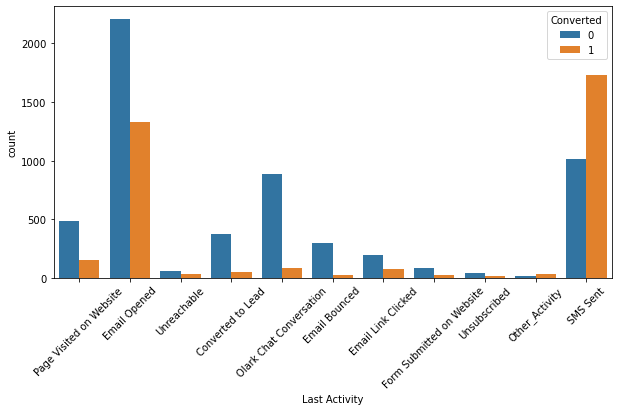

In [88]:
# Again creating countplot
plt.figure(figsize=(10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df)
plt.xticks(rotation = 45)
plt.show()

### 9) Country

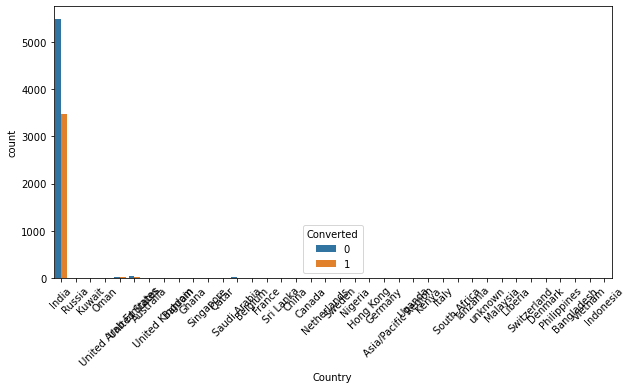

In [89]:
# Countplot with reference to target variable
plt.figure(figsize=(10,5))
sns.countplot(x = "Country", hue = "Converted", data = lead_df)
plt.xticks(rotation = 45)
plt.show()

### 10) Specialization

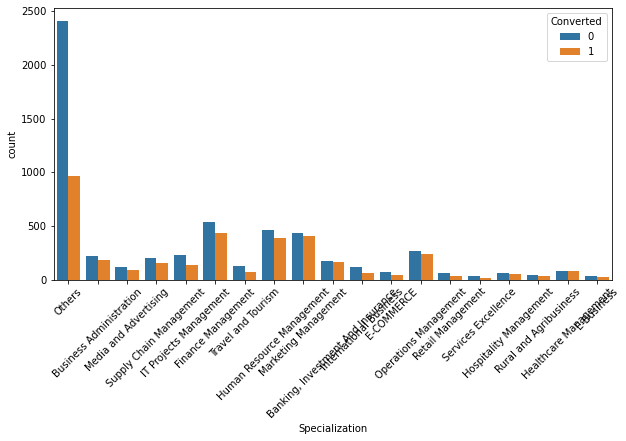

In [91]:
# Countplot with reference to target variable
plt.figure(figsize=(10,5))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_df)
plt.xticks(rotation = 45)
plt.show()

### 11) What is your current occupation

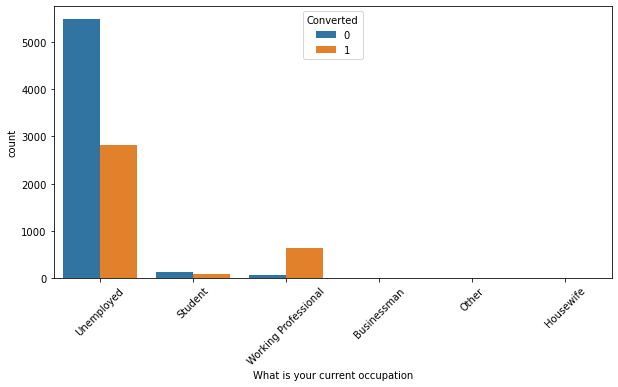

In [93]:
# Countplot with reference to target variable
plt.figure(figsize=(10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_df)
plt.xticks(rotation = 45)
plt.show()

### 12) Search

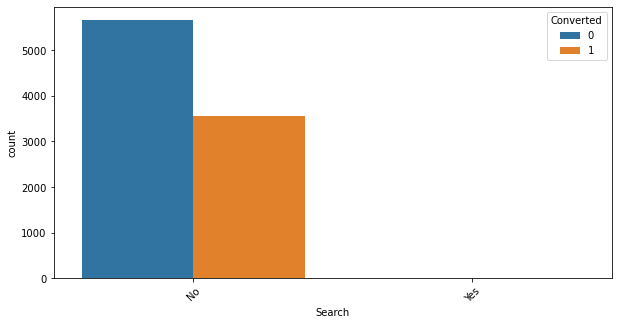

In [94]:
# Countplot with reference to target variable
plt.figure(figsize=(10,5))
sns.countplot(x = "Search", hue = "Converted", data = lead_df)
plt.xticks(rotation = 45)
plt.show()

### 13) Newspaper Article

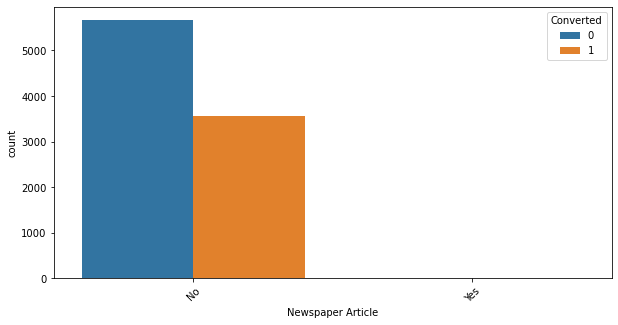

In [95]:
# Countplot with reference to target variable
plt.figure(figsize=(10,5))
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_df)
plt.xticks(rotation = 45)
plt.show()

### 14) X Education Forums 

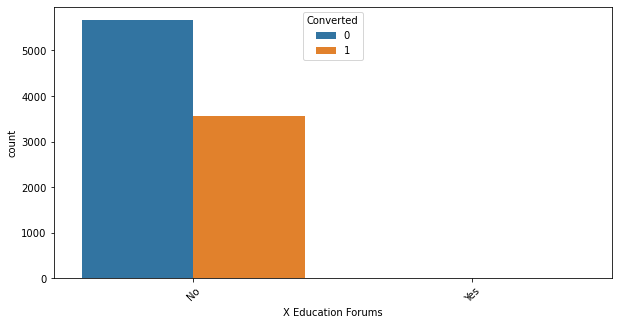

In [96]:
# Countplot with reference to target variable
plt.figure(figsize=(10,5))
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_df)
plt.xticks(rotation = 45)
plt.show()

### 15) Newspaper

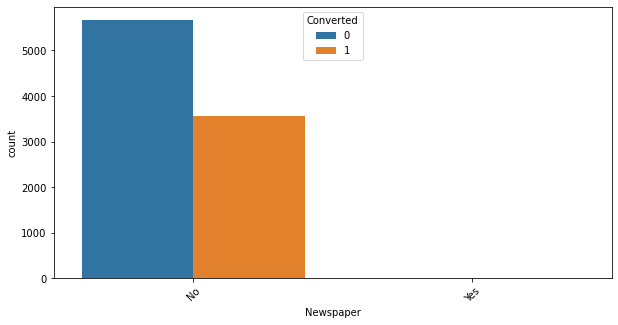

In [97]:
# Countplot with reference to target variable
plt.figure(figsize=(10,5))
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_df)
plt.xticks(rotation = 45)
plt.show()

### 16) Digital Advertisement

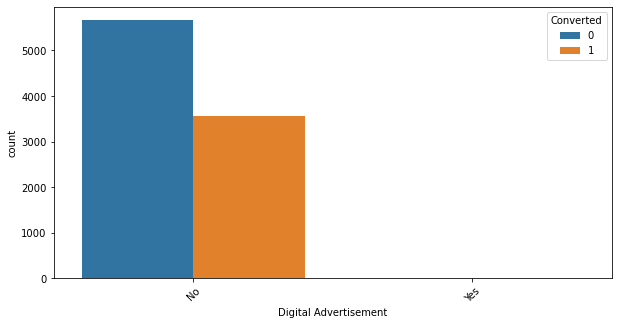

In [98]:
# Countplot with reference to target variable
plt.figure(figsize=(10,5))
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_df)
plt.xticks(rotation = 45)
plt.show()

### 17) Through Recommendations

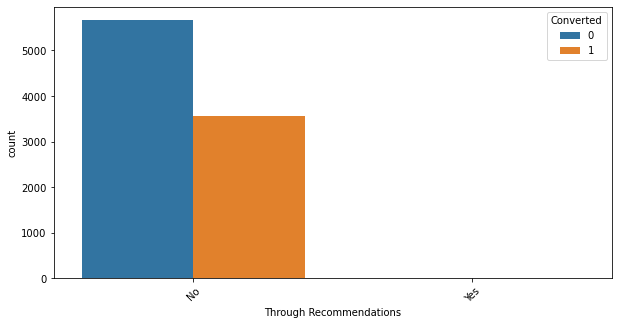

In [100]:
# Countplot with reference to target variable
plt.figure(figsize=(10,5))
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_df)
plt.xticks(rotation = 45)
plt.show()

### 18) Tags

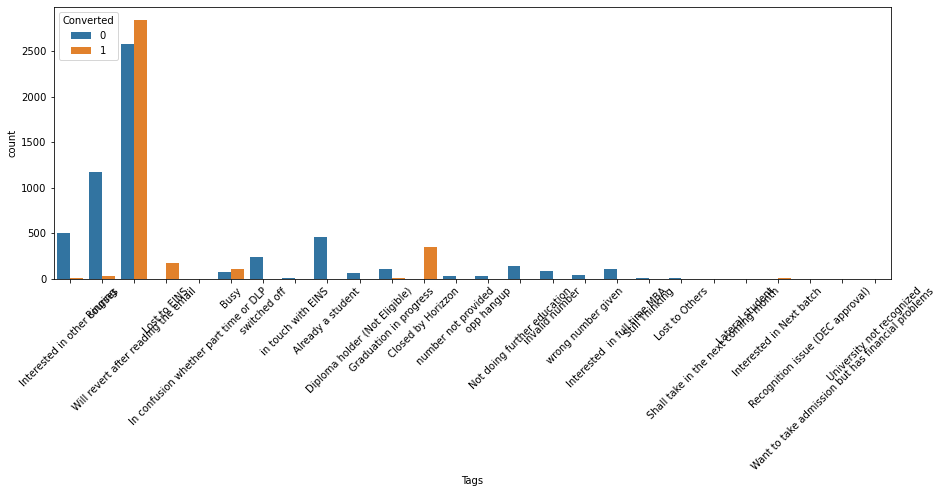

In [102]:
# Countplot with reference to target variable
plt.figure(figsize=(15,5))
sns.countplot(x = "Tags", hue = "Converted", data = lead_df)
plt.xticks(rotation = 45)
plt.show()

### 19) City

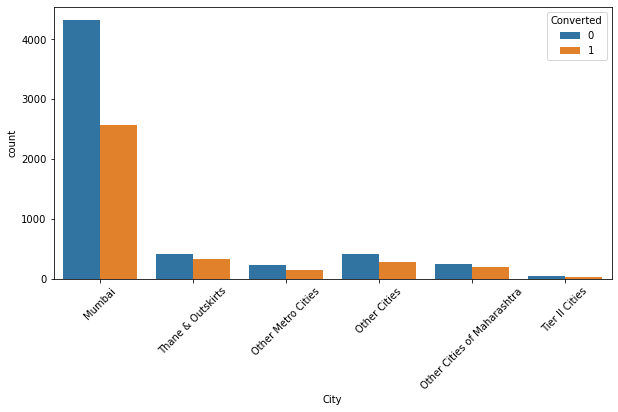

In [103]:
# Countplot with reference to target variable
plt.figure(figsize=(10,5))
sns.countplot(x = "City", hue = "Converted", data = lead_df)
plt.xticks(rotation = 45)
plt.show()

### 20) A free copy of Mastering The Interview

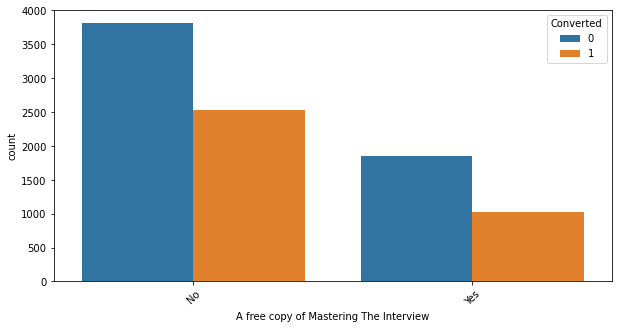

In [104]:
# Countplot with reference to target variable
plt.figure(figsize=(10,5))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_df)
plt.xticks(rotation = 45)
plt.show()

### 21) Last Notable Activity

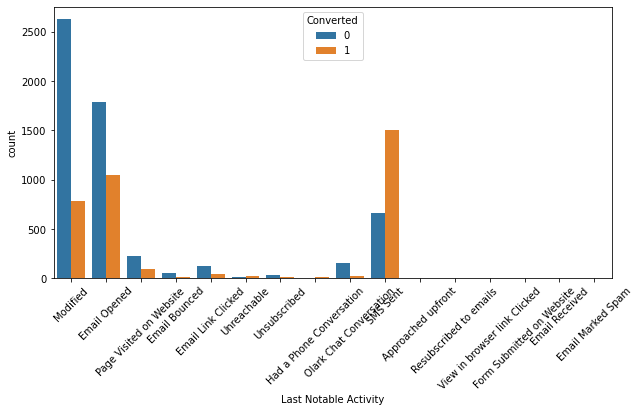

In [105]:
# Countplot with reference to target variable
plt.figure(figsize=(10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_df)
plt.xticks(rotation = 45)
plt.show()

##### Some variables do not contribute to the analysis, so we can drop them.

In [106]:
lead_df = lead_df.drop(['Country','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Tags','A free copy of Mastering The Interview'],1)

In [107]:
lead_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'Last Notable Activity'],
      dtype='object')

## Step 3 : Data Preparation

### a) Encoding

In [108]:
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified


#### Renaming some columns for easier implementation

In [109]:
lead_df.rename(columns={'Do Not Email' : 'Email','Do Not Call' : 'Call', 'Total Time Spent on Website' : 'Time Spent', 'Page Views Per Visit' : 'Page Views', 'What is your current occupation':'Occupation'}, inplace=True )

In [110]:
lead_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Email', 'Call',
       'Converted', 'TotalVisits', 'Time Spent', 'Page Views', 'Last Activity',
       'Specialization', 'Occupation', 'City', 'Last Notable Activity'],
      dtype='object')

### Converting Binary variables (Yes/No) to 0/1

In [111]:
# List of variables to map
varlist =  ['Email', 'Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the variable list
lead_df[varlist] = lead_df[varlist].apply(binary_map)

In [112]:
# Checking the replacements
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Email,Call,Converted,TotalVisits,Time Spent,Page Views,Last Activity,Specialization,Occupation,City,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified


### Creating Dummy Variables

In [113]:
# Checking for all the categorical variables
lead_df.dtypes

Lead Number                int64
Lead Origin               object
Lead Source               object
Email                      int64
Call                       int64
Converted                  int64
TotalVisits              float64
Time Spent                 int64
Page Views               float64
Last Activity             object
Specialization            object
Occupation                object
City                      object
Last Notable Activity     object
dtype: object

In [114]:
# Creating a dummy variable for the categorical variables.
dummy = pd.get_dummies(lead_df[['Last Notable Activity']])

In [115]:
dummy.head()

,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [116]:
# Lead Origin
# Creating dummy variables for the variable 'Lead Origin'
dl = pd.get_dummies(lead_df['Lead Origin'], prefix='Lead Origin')
# Dropping Lead Origin_Landing Page Submission column
dummy1 = dl.drop(['Lead Origin_Landing Page Submission'], 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,dummy1], axis=1)

In [117]:
# Lead Source
# Creating dummy variables for the variable 'Lead Origin'
d2 = pd.get_dummies(lead_df['Lead Source'], prefix='Lead Source')
# Dropping Lead Origin_Landing Page Submission column
dummy2 = d2.drop(['Lead Source_Welingak Website'], 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,dummy2], axis=1)

In [118]:
# Last Activity
# Creating dummy variables for the variable 'Lead Origin'
d3 = pd.get_dummies(lead_df['Last Activity'], prefix='Last Activity')
# Dropping Lead Origin_Landing Page Submission column
dummy3 = d3.drop(['Last Activity_Form Submitted on Website'], 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,dummy3], axis=1)

In [119]:
# Specialization
# Creating dummy variables for the variable 'Lead Origin'
d4 = pd.get_dummies(lead_df['Specialization'], prefix='Specialization')
# Dropping Lead Origin_Landing Page Submission column
dummy4 = d4.drop(['Specialization_Banking, Investment And Insurance'], 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,dummy4], axis=1)

In [120]:
# Occupation
# Creating dummy variables for the variable 'Lead Origin'
d5 = pd.get_dummies(lead_df['Occupation'], prefix='Occupation')
# Dropping Lead Origin_Landing Page Submission column
dummy5 = d5.drop(['Occupation_Working Professional'], 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,dummy5], axis=1)

In [121]:
# City
# Creating dummy variables for the variable 'Lead Origin'
d6 = pd.get_dummies(lead_df['City'], prefix='City')
# Dropping Lead Origin_Landing Page Submission column
dummy6 = d6.drop(['City_Other Cities of Maharashtra'], 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,dummy6], axis=1)

In [122]:
# Last Notable Activity
# Creating dummy variables for the variable 'Lead Origin'
d7 = pd.get_dummies(lead_df['Last Notable Activity'], prefix='Last Notable Activity')
# Dropping Lead Origin_Landing Page Submission column
dummy7 = d7.drop(['Last Notable Activity_Form Submitted on Website'], 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,dummy7], axis=1)

In [123]:
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Email,Call,Converted,TotalVisits,Time Spent,Page Views,Last Activity,...,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [124]:
# We have created dummies for the below variables, so we can drop them
lead_df = lead_df.drop(['Lead Origin','Lead Source','Last Activity','Specialization','Occupation', 'City', 'Last Notable Activity'], 1)

In [125]:
lead_df.head()

,Lead Number,Email,Call,Converted,TotalVisits,Time Spent,Page Views,Lead Origin_API,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.0,0,0.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [126]:
# Checking for all the datatype conversions
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 72 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Lead Number                                         9240 non-null   int64  
 1   Email                                               9240 non-null   int64  
 2   Call                                                9240 non-null   int64  
 3   Converted                                           9240 non-null   int64  
 4   TotalVisits                                         9240 non-null   float64
 5   Time Spent                                          9240 non-null   int64  
 6   Page Views                                          9240 non-null   float64
 7   Lead Origin_API                                     9240 non-null   uint8  
 8   Lead Origin_Lead Add Form                           9240 non-null   uint8  
 9

### b) Train - Test Split

In [127]:
# Putting feature variable to X
X = lead_df.drop(['Lead Number','Converted'], axis=1)
X.head()

,Email,Call,TotalVisits,Time Spent,Page Views,Lead Origin_API,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [128]:
# Putting target variable to y
y = lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [129]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### c) Rescaling the Features

In [130]:
scaler = StandardScaler()
X_train[['TotalVisits','Time Spent','Page Views']] = scaler.fit_transform(X_train[['TotalVisits','Time Spent','Page Views']])
X_train.head()

,Email,Call,TotalVisits,Time Spent,Page Views,Lead Origin_API,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,-1.149699,-0.885371,-1.266675,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.299722,0.005716,-0.516439,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3516,0,0,0.662077,-0.691418,0.143543,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0,0.662077,1.365219,1.553761,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,0,-1.149699,-0.885371,-1.266675,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [131]:
# Checking the Lead Conversion rate
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

38.53896103896104

## Step 4: Look at the Correlations

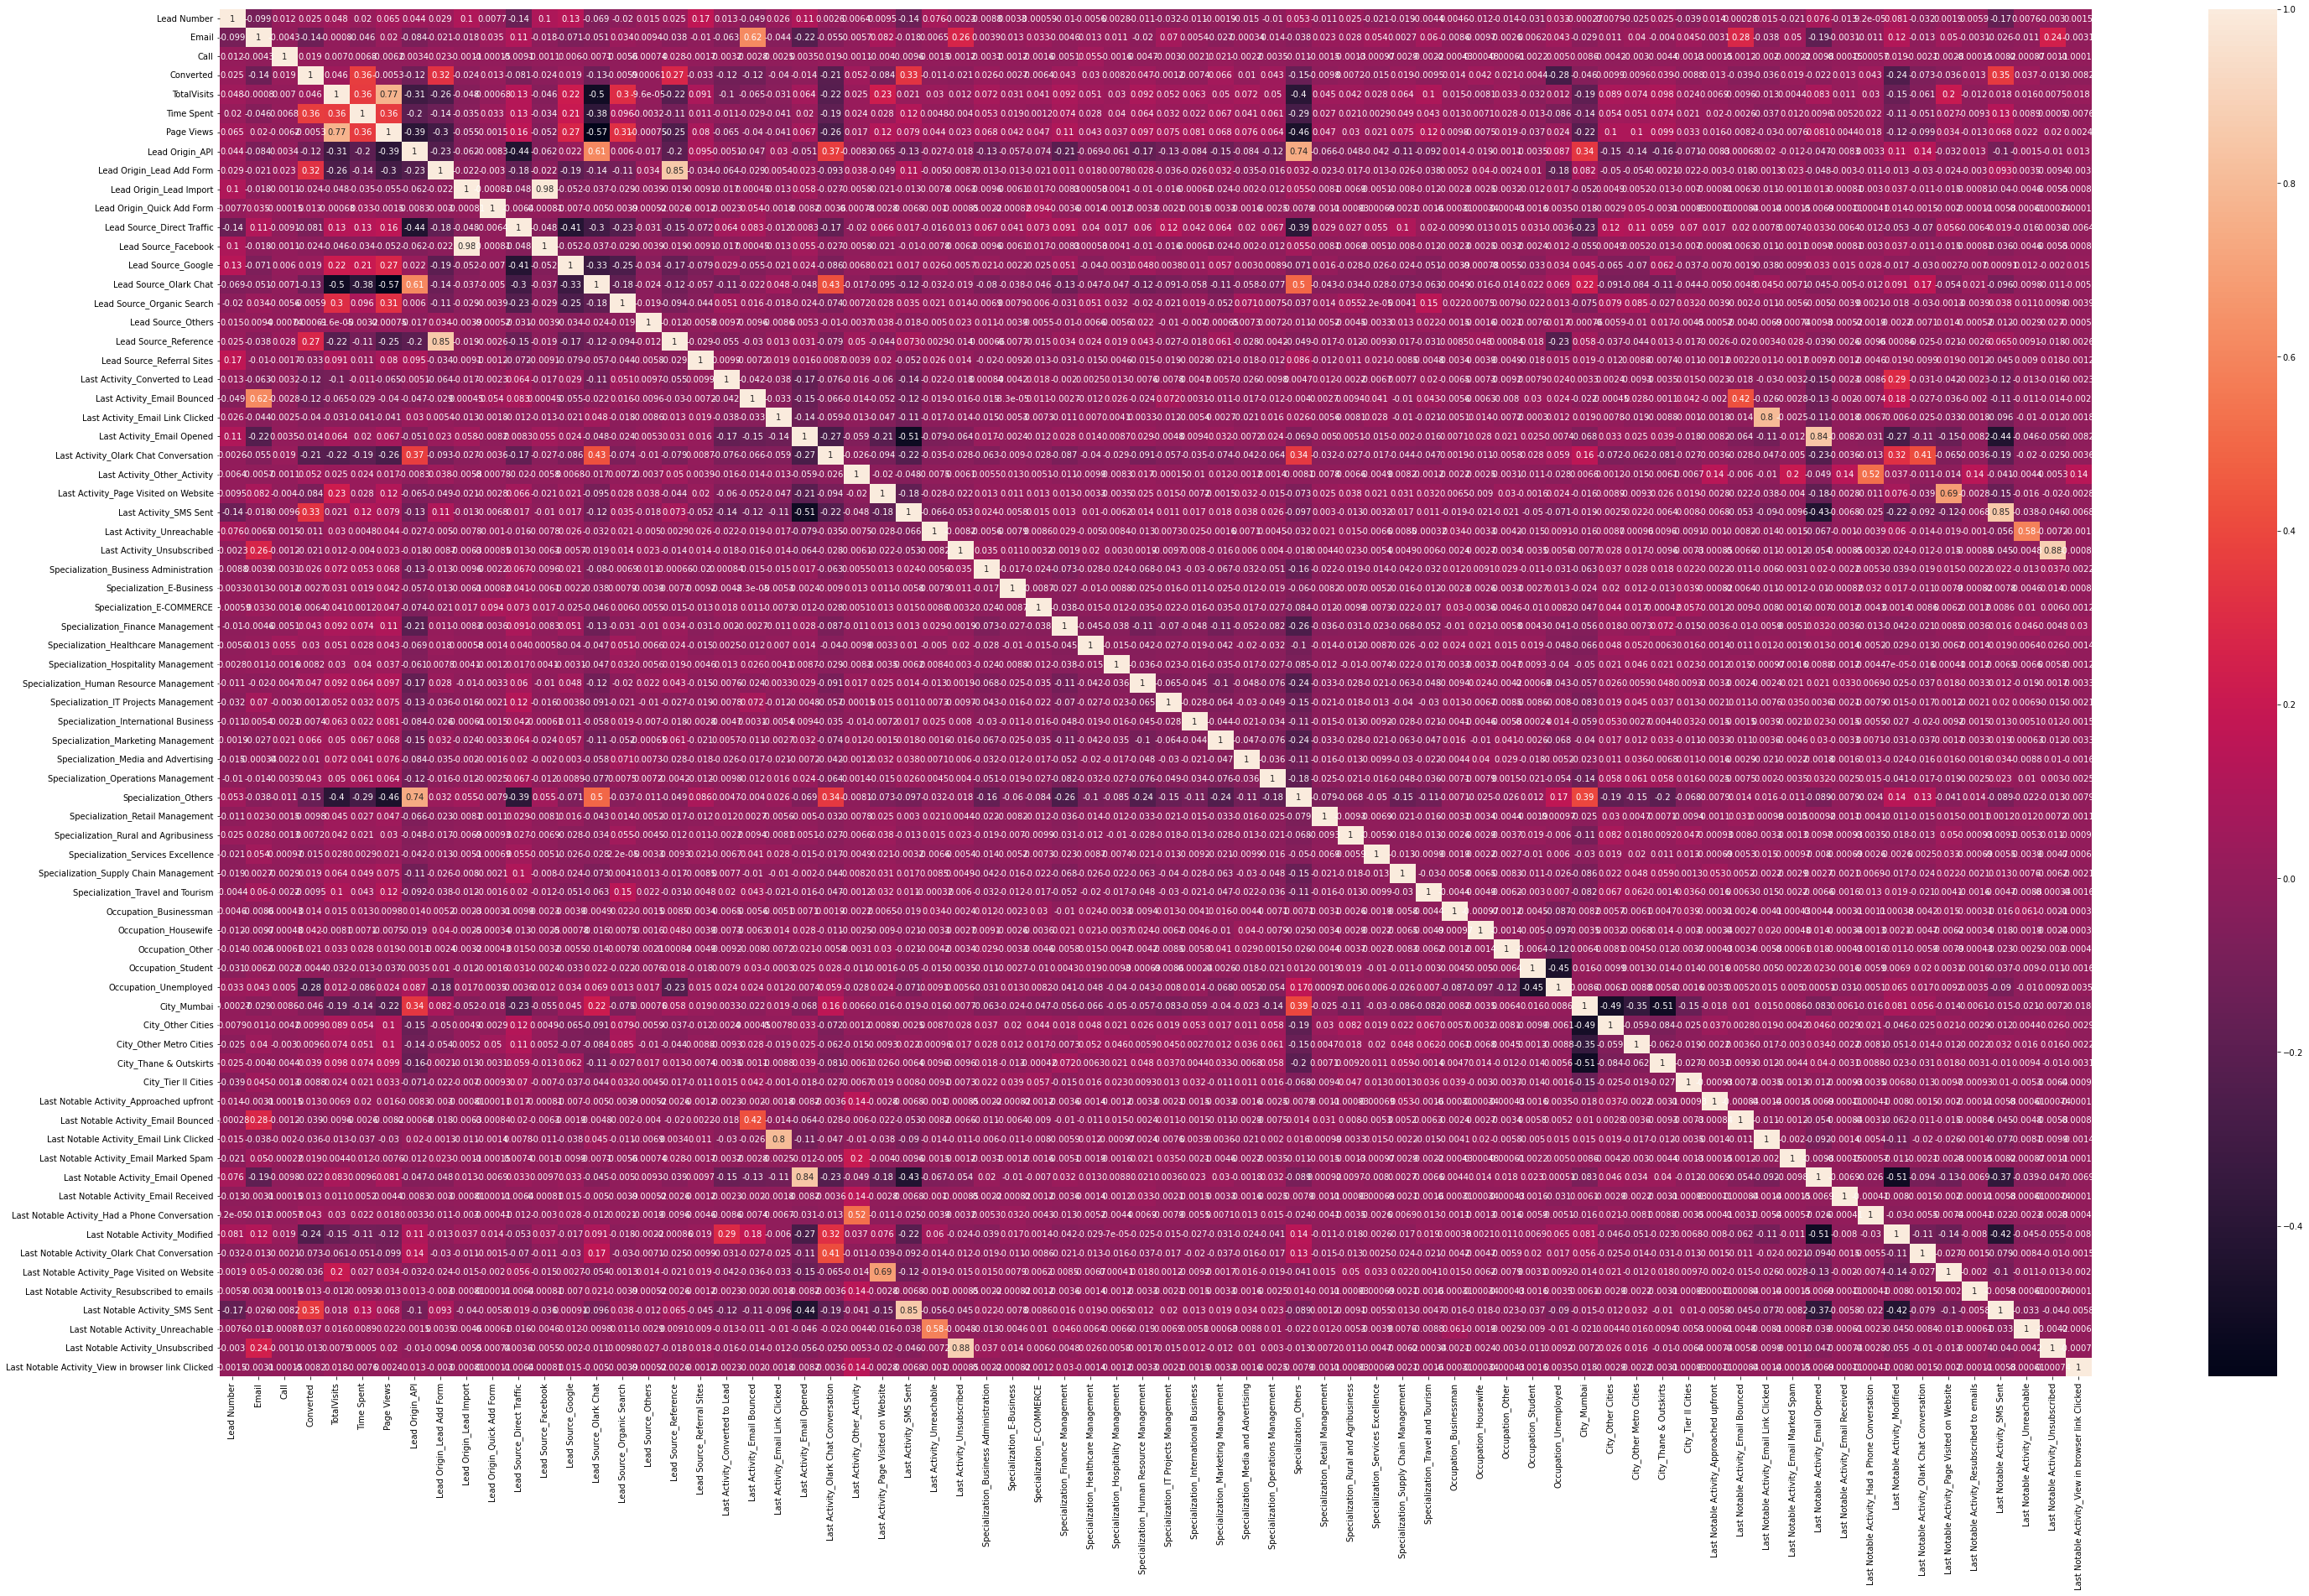

In [132]:
# Let's see the correlation matrix 
plt.figure(figsize = (50,30)) # Size of the figure
sns.heatmap(lead_df.corr(),annot = True)
plt.show()

## Running our initial model

In [133]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6399
Model Family:                Binomial   Df Model:                           68
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2581.5
Date:                Tue, 30 May 2023   Deviance:                       5163.0
Time:                        16:48:27   Pearson chi2:                 7.77e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4121
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                -17.3433   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Email                                                 -1.1283      0.219     -5.148      0.000      -1.558      -0.699
Call                                                  22.4901    5.3e+04      0.000      1.000   -1.04e+05    1.04e+05
TotalVisits                                            0.3272      0.056      5.821      0.000       0.217       0.437
Time Spent                                             1.0745      0.041     26.434      0.000       0.995       1.154
Page Views                                            -0.3481      0.062     -5.582      0.000      -0.470      -0.226
Lead Origin_API                                        0.9691      0.140      6.928      0.000       0.695       1.243
Lead Origin_Lead Add Form                              2.6845      0.946      2.837      0.005       0.830       4.539
Lead Origin_Lead Import                               -0.0087      1.565     -0.006      0.996      -3.077       3.059
Lead Origin_Quick Add Form                            20.9378   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                            -3.1037      1.017     -3.053      0.002      -5.096      -1.111
Lead Source_Facebook                                  -2.2958      1.562     -1.470      0.142      -5.357       0.765
Lead Source_Google                                    -2.7434      1.015     -2.702      0.007      -4.733      -0.754
Lead Source_Olark Chat                                -1.9046      1.019     -1.869      0.062      -3.902       0.093
Lead Source_Organic Search                            -2.9347      1.019     -2.880      0.004      -4.932      -0.938
Lead Source_Others                                    -2.2719      0.985     -2.307      0.021      -4.202      -0.342
Lead Source_Reference                                 -1.4630      0.454     -3.223      0.001      -2.353      -0.573
Lead Source_Referral Sites                            -2.9564      1.060     -2.790      0.005      -5.033      -0.879
Last Activity_Converted to Lead                       -0.1882      0.410     -0.459      0.646      -0.992       0.615
Last Activity_Email Bounced                           -0.7098      0.575     -1.235      0.217      -1.837       0.417
Last Activity_Email Link Clicked                       0.2964      0.512      0.579      0.563      -0.707       1.300
Last Activity_Email Opened                             0.7321      0.371      1.976      0.048       0.006       1.458
Last Activity_Olark Chat Conversation                 -0.5228      0.395     -1.323      0.186      -1.298  

## Step 5 : Feature Selection using RFE

In [134]:
logreg = LogisticRegression()

In [135]:
# running RFE with 20 variables as output
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [136]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
        True, False,  True, False,  True, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False,  True, False, False])

In [137]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Email', True, 1),
 ('Call', False, 13),
 ('TotalVisits', False, 18),
 ('Time Spent', True, 1),
 ('Page Views', False, 17),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 43),
 ('Lead Origin_Quick Add Form', False, 24),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 16),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', False, 37),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Others', False, 7),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', True, 1),
 ('Last Activity_Converted to Lead', False, 22),
 ('Last Activity_Email Bounced', False, 11),
 ('Last Activity_Email Link Clicked', False, 41),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Olark Chat Conversation', False, 9),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 28),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable

In [138]:
# Viewing the columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Email', 'Time Spent', 'Lead Origin_API', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Occupation_Businessman', 'Occupation_Other', 'Occupation_Student',
       'Occupation_Unemployed',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [139]:
# Viewing the columns rejected by RFE
X_train.columns[~rfe.support_]

Index(['Call', 'TotalVisits', 'Page Views', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Manageme

## Step 6 : Model Building

### Model - 1

In [140]:
# Creating first model
# Adding Constant 
X_train_sm = sm.add_constant(X_train[cols])

# Create the model
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Fit the model
res = logm2.fit()

# Summary Statistics
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2648.0
Date:                Tue, 30 May 2023   Deviance:                       5295.9
Time:                        16:48:36   Pearson chi2:                 8.51e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3998
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              2.4403      0.226     10.796      0.000       1.997       2.883
Email                                             -1.1500      0.167     -6.875      0.000      -1.478      -0.822
Time Spent                                         1.0787      0.040     27.159      0.000       1.001       1.157
Lead Origin_API                                    0.9837      0.131      7.489      0.000       0.726       1.241
Lead Origin_Lead Add Form                          3.6733      0.221     16.606      0.000       3.240       4.107
Lead Source_Direct Traffic                        -1.1764      0.143     -8.232      0.000      -1.456      -0.896
Lead Source_Google                                -0.8446      0.122     -6.950      0.000      -1.083      -0.606
Lead Source_Organic Search                        -1.0104      0.144     -7.034      0.000      -1.292      -0.729
Lead Source_Referral Sites                        -1.0511      0.320     -3.280      0.001      -1.679      -0.423
Last Activity_Other_Activity                       1.7115      0.554      3.088      0.002       0.625       2.798
Last Activity_SMS Sent                             1.3254      0.074     17.803      0.000       1.179       1.471
Specialization_Hospitality Management             -1.0561      0.334     -3.162      0.002      -1.711      -0.402
Specialization_Others                             -1.1118      0.122     -9.093      0.000      -1.351      -0.872
Occupation_Businessman                            -2.8852      1.171     -2.463      0.014      -5.181      -0.590
Occupation_Other                                  -2.5596      0.847     -3.021      0.003      -4.220      -0.899
Occupation_Student                                -2.3116      0.310     -7.462      0.000      -2.919      -1.704
Occupation_Unemployed                             -2.6961      0.194    -13.928      0.000      -3.076      -2.317
Last Notable Activity_Had a Phone Conversation     1.4748      1.234      1.195      0.232      -0.943       3.893
Last Notable Activity_Modified                    -1.0477      0.079    -13.223      0.000      -1.203      -0.892
Last Notable Activity_Olark Chat Conversation     -1.2537      0.337     -3.717      0.000      -1.915      -0.593
Last Notable Activity_Unreachable                  1.4969      0.524      2.854      0.004       0.469       2.525
==================================================================================================================
"""

In [141]:
# Dropping the column 'Last Notable Activity_Had a Phone Conversation'
col1 = cols.drop('Last Notable Activity_Had a Phone Conversation')

### Model - 2

In [142]:
# Adding Constant 
X_train_sm = sm.add_constant(X_train[col1])

# Create the model
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Fit the model
res = logm2.fit()

# Summary Statistics
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2648.8
Date:                Tue, 30 May 2023   Deviance:                       5297.6
Time:                        16:48:39   Pearson chi2:                 9.13e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3997
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             2.4369      0.226     10.788      0.000       1.994       2.880
Email                                            -1.1509      0.167     -6.878      0.000      -1.479      -0.823
Time Spent                                        1.0772      0.040     27.144      0.000       0.999       1.155
Lead Origin_API                                   0.9854      0.131      7.510      0.000       0.728       1.243
Lead Origin_Lead Add Form                         3.6754      0.221     16.613      0.000       3.242       4.109
Lead Source_Direct Traffic                       -1.1758      0.143     -8.232      0.000      -1.456      -0.896
Lead Source_Google                               -0.8412      0.121     -6.924      0.000      -1.079      -0.603
Lead Source_Organic Search                       -1.0088      0.144     -7.023      0.000      -1.290      -0.727
Lead Source_Referral Sites                       -1.0532      0.321     -3.280      0.001      -1.683      -0.424
Last Activity_Other_Activity                      2.0966      0.473      4.429      0.000       1.169       3.024
Last Activity_SMS Sent                            1.3243      0.074     17.793      0.000       1.178       1.470
Specialization_Hospitality Management            -1.0561      0.334     -3.162      0.002      -1.711      -0.402
Specialization_Others                            -1.1164      0.122     -9.134      0.000      -1.356      -0.877
Occupation_Businessman                           -2.8805      1.171     -2.461      0.014      -5.175      -0.586
Occupation_Other                                 -2.5528      0.847     -3.012      0.003      -4.214      -0.892
Occupation_Student                               -2.3068      0.310     -7.447      0.000      -2.914      -1.700
Occupation_Unemployed                            -2.6908      0.193    -13.911      0.000      -3.070      -2.312
Last Notable Activity_Modified                   -1.0539      0.079    -13.320      0.000      -1.209      -0.899
Last Notable Activity_Olark Chat Conversation    -1.2544      0.337     -3.720      0.000      -1.915      -0.594
Last Notable Activity_Unreachable                 1.4934      0.524      2.848      0.004       0.465       2.521
=================================================================================================================
"""

In [143]:
# Creating a dataframe that contains names of all feature variables and their respective VIFs.
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Occupation_Unemployed,7.60
2,Lead Origin_API,4.43
11,Specialization_Others,4.35
4,Lead Source_Direct Traffic,2.94
5,Lead Source_Google,2.69
16,Last Notable Activity_Modified,1.72
6,Lead Source_Organic Search,1.65
9,Last Activity_SMS Sent,1.52
3,Lead Origin_Lead Add Form,1.46
1,Time Spent,1.25


In [144]:
# VIF value >5 is considered high
# Dropping the column 'Occupation_Unemployed' because it has high VIF
col1 = col1.drop('Occupation_Unemployed')

### Model - 3 (Final Model)

In [145]:
# Adding Constant 
X_train_sm = sm.add_constant(X_train[col1])

# Create the model
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Fit the model
res = logm2.fit()

# Summary Statistics
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2792.6
Date:                Tue, 30 May 2023   Deviance:                       5585.3
Time:                        16:48:45   Pearson chi2:                 6.74e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3724
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [146]:
# Creating a dataframe that contains names of all feature variables and their respective VIFs.
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_API,4.18
11,Specialization_Others,4.11
15,Last Notable Activity_Modified,1.66
5,Lead Source_Google,1.51
9,Last Activity_SMS Sent,1.50
4,Lead Source_Direct Traffic,1.37
3,Lead Origin_Lead Add Form,1.30
1,Time Spent,1.21
6,Lead Source_Organic Search,1.20
0,Email,1.13


## Step 7 : Making Predictions on Train Set

In [147]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.534875
6795    0.064794
3516    0.250655
8105    0.871365
3934    0.086006
4844    0.893263
3297    0.135609
8071    0.991593
987     0.153943
7423    0.905647
dtype: float64

In [148]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.53487479, 0.06479449, 0.25065515, 0.87136515, 0.08600614,
       0.89326285, 0.13560929, 0.99159273, 0.15394345, 0.90564702])

In [149]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities.
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number
0,0,0.534875,1871
1,0,0.064794,6795
2,0,0.250655,3516
3,0,0.871365,8105
4,0,0.086006,3934


#### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels.

In [150]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted
0,0,0.534875,1871,1
1,0,0.064794,6795,0
2,0,0.250655,3516,0
3,0,0.871365,8105,1
4,0,0.086006,3934,0


### Making the Confusion matrix

In [151]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3510  492]
 [ 736 1730]]


### Accuracy

In [152]:
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8101422387136673


### Metrics beyond  Accuracy

In [153]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Sensitivity

In [154]:
# Calculate sensitivity of our logistic regression model
TP / float(TP+FN)

0.7015409570154095

#### Specificity

In [155]:
# Calculate specificity of our logistic regression model
TN / float(TN+FP)

0.8770614692653673

In [156]:
# Calculate False Postive Rate
print(FP/ float(TN+FP))

0.12293853073463268


In [157]:
# Calculate Positive Predictive Value 
print (TP / float(TP+FP))

0.7785778577857786


In [158]:
# Calculate Negative Predictive Value
print (TN / float(TN+FN))

0.8266603862458785


## Step 8 : ROC Curve

In [159]:
# Plotting Of ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [160]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

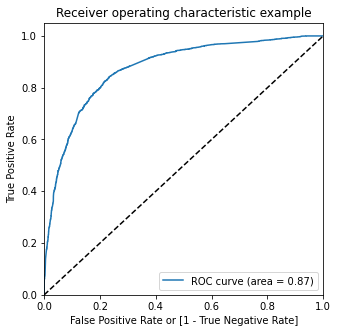

In [161]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## Step 9 : Finding Optimal Cut-off Point

In [162]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.534875,1871,1,1,1,1,1,1,1,0,0,0,0
1,0,0.064794,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.250655,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.871365,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.086006,3934,0,1,0,0,0,0,0,0,0,0,0


In [163]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.600649,0.968775,0.373813
0.2,0.2,0.731293,0.917680,0.616442
0.3,0.3,0.794991,0.838605,0.768116
0.4,0.4,0.805813,0.775750,0.824338
0.5,0.5,0.810142,0.701541,0.877061
0.6,0.6,0.790043,0.585564,0.916042
0.7,0.7,0.773964,0.501217,0.942029
0.8,0.8,0.749227,0.398621,0.965267
0.9,0.9,0.694960,0.222628,0.986007


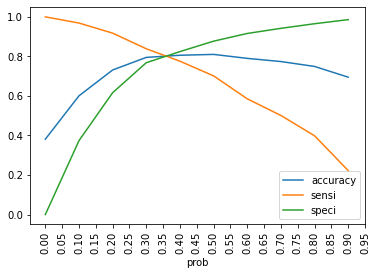

<Figure size 792x792 with 0 Axes>

In [164]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step=0.05), rotation = 90)
plt.figure(figsize=(11,11))
plt.tight_layout()
plt.show()

##### From the curve above, 0.36 is the optimum point to take it as a cutoff probability.

In [165]:
# Calculation of predicted values on the score : 0.36
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.534875,1871,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.064794,6795,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.250655,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.871365,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.086006,3934,0,1,0,0,0,0,0,0,0,0,0,0


#### Confusion Matrix

In [166]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3209,  793],
       [ 497, 1969]], dtype=int64)

#### Accuracy

In [167]:
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.800556586270872


In [168]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

#### Sensitivity

In [169]:
TP / float(TP+FN)

0.7984590429845905

#### Specificity

In [170]:
TN / float(TN+FP)

0.8018490754622689

In [171]:
# False Postive Rate 
print(FP/ float(TN+FP))

0.19815092453773114


In [172]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7128892107168718


In [173]:
# Negative predictive value
print (TN / float(TN+FN))

0.8658931462493255


## Step 10 : Making Predictions on the Test Set

### Scaling the feature variables

In [174]:
X_test[['TotalVisits','Time Spent','Page Views']] = scaler.transform(X_test[['TotalVisits','Time Spent','Page Views']])

In [175]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Email,Time Spent,Lead Origin_API,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,Occupation_Businessman,Occupation_Other,Occupation_Student,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
4269,0,0.964504,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
2376,0,-0.885371,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
7766,0,-0.777416,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
9199,0,-0.885371,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4359,0,-0.885371,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [176]:
# Adding constant
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.694376
2376    0.938942
7766    0.697474
9199    0.086006
4359    0.946297
9186    0.662353
1631    0.541573
8963    0.161579
8007    0.097036
5324    0.442110
dtype: float64

In [177]:
# Converting y_test_pred to a dataframe 
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.694376
2376,0.938942
7766,0.697474
9199,0.086006
4359,0.946297


In [178]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [179]:
# Putting Lead Score to index
y_test_df['Lead Score'] = y_test_df.index

In [180]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [181]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead Score,0
0,1,4269,0.694376
1,1,2376,0.938942
2,1,7766,0.697474
3,0,9199,0.086006
4,1,4359,0.946297


In [182]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [183]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Score','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,Lead Score,Converted,Converted_Prob
0,4269,1,0.694376
1,2376,1,0.938942
2,7766,1,0.697474
3,9199,0,0.086006
4,4359,1,0.946297


In [184]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Lead Score,Converted,Converted_Prob,final_predicted
0,4269,1,0.694376,1
1,2376,1,0.938942,1
2,7766,1,0.697474,1
3,9199,0,0.086006,0
4,4359,1,0.946297,1


#### Confusion Matrix

In [185]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1420,  257],
       [ 276,  819]], dtype=int64)

#### Accuracy

In [186]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8077200577200577

In [187]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0]

#### Sensitivity

In [188]:
TP / float(TP+FN)

0.7479452054794521

#### Specificity

In [189]:
TN / float(TN+FP)

0.8467501490757304

## Results: 

### Train Data

### Test Data

### Finding out the leads which should be contacted

In [192]:
hot_leads=y_pred_final.loc[y_pred_final["Lead Score"]>=85]
hot_leads

,Lead Score,Converted,Converted_Prob,final_predicted
0,4269,1,0.694376,1
1,2376,1,0.938942,1
2,7766,1,0.697474,1
3,9199,0,0.086006,0
4,4359,1,0.946297,1
...,...,...,...,...
2767,8649,0,0.165594,0
2768,2152,1,0.938942,1
2769,7101,0,0.212875,0
2770,5331,0,0.227832,0


In [193]:
print("The Lead Score of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Lead Score"].values.reshape(-1)
print(hot_leads_ids)

The Lead Score of the customers which should be contacted are :
[4269 2376 7766 ... 7101 5331 2960]


### Top Feature variables of our model

In [194]:
res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                        3.857532
Last Activity_Other_Activity                     2.273029
Last Notable Activity_Unreachable                1.453525
Last Activity_SMS Sent                           1.311252
Lead Origin_API                                  1.128164
Time Spent                                       1.095951
Occupation_Student                               0.235358
const                                           -0.018115
Occupation_Other                                -0.108859
Occupation_Businessman                          -0.488829
Lead Source_Google                              -0.876268
Specialization_Hospitality Management           -0.927607
Lead Source_Referral Sites                      -0.974927
Lead Source_Organic Search                      -1.034261
Last Notable Activity_Modified                  -1.055721
Email                                           -1.190695
Lead Source_Direct Traffic                      -1.210285
Last Notable A